<a href="https://colab.research.google.com/github/Jatinnn27/Face-Mask-Detection-Using-CNN/blob/master/Face_Mask_detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 91% 148M/163M [00:00<00:00, 194MB/s]
100% 163M/163M [00:00<00:00, 198MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1523.jpg', 'with_mask_1806.jpg', 'with_mask_1313.jpg', 'with_mask_2796.jpg', 'with_mask_995.jpg']
['with_mask_1664.jpg', 'with_mask_911.jpg', 'with_mask_419.jpg', 'with_mask_971.jpg', 'with_mask_2073.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3287.jpg', 'without_mask_1525.jpg', 'without_mask_2181.jpg', 'without_mask_3278.jpg', 'without_mask_1015.jpg']
['without_mask_795.jpg', 'without_mask_1757.jpg', 'without_mask_2935.jpg', 'without_mask_2833.jpg', 'without_mask_317.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

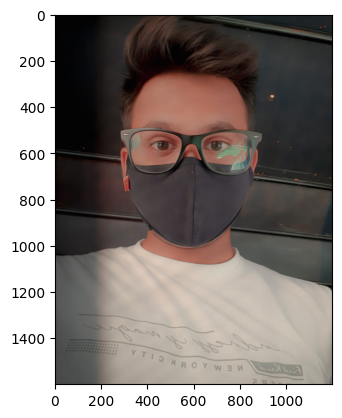

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/test_mayankgajbhiye.jpg')
imgplot = plt.imshow(img)
plt.show()

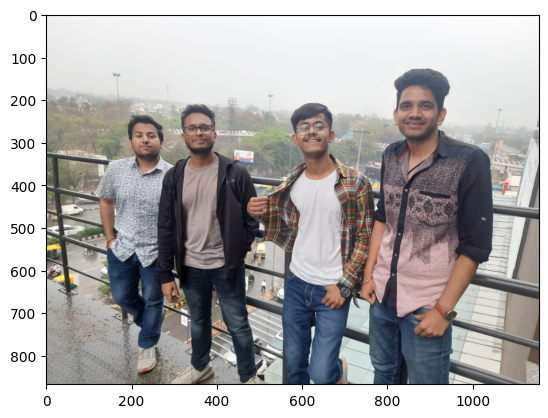

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/test_group_pic.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[216, 237, 249],
        [224, 243, 251],
        [230, 248, 248],
        ...,
        [  7,  46,  83],
        [  7,  49,  89],
        [  7,  51,  93]],

       [[219, 236, 248],
        [226, 243, 249],
        [234, 251, 250],
        ...,
        [  3,  49,  87],
        [  2,  51,  92],
        [  4,  54,  96]],

       [[221, 238, 251],
        [227, 244, 252],
        [231, 249, 251],
        ...,
        [  4,  54,  94],
        [  4,  57, 100],
        [  3,  59, 103]],

       ...,

       [[ 81, 147, 217],
        [ 79, 148, 213],
        [ 80, 150, 213],
        ...,
        [ 13,  54,  95],
        [ 12,  44,  89],
        [ 18,  42,  92]],

       [[ 64, 132, 207],
        [ 61, 134, 201],
        [ 59, 137, 199],
        ...,
        [  2,  59,  92],
        [  5,  61,  95],
        [ 20,  77, 114]],

       [[ 46, 121, 194],
        [ 46, 122, 190],
        [ 46, 124, 187],
        ...,
        [ 17,  93, 128],
        [ 32, 109, 144],
        [ 59, 141, 175]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[109, 107, 118],
        [114, 113, 121],
        [109, 107, 116],
        ...,
        [ 90,  97, 107],
        [ 90,  94, 105],
        [ 93,  97, 108]],

       [[110, 108, 119],
        [111, 108, 117],
        [110, 105, 114],
        ...,
        [ 86,  93, 103],
        [ 88,  92, 103],
        [ 89,  93, 104]],

       [[112, 107, 118],
        [113, 109, 118],
        [123, 117, 125],
        ...,
        [ 89,  95, 105],
        [ 91,  95, 106],
        [ 87,  91, 102]],

       ...,

       [[ 46,  66,  91],
        [ 45,  65,  90],
        [ 47,  67,  92],
        ...,
        [177, 143, 123],
        [176, 144, 123],
        [177, 145, 124]],

       [[ 49,  69,  93],
        [ 47,  67,  91],
        [ 46,  66,  90],
        ...,
        [179, 146, 126],
        [178, 146, 125],
        [177, 146, 125]],

       [[ 43,  63,  87],
        [ 43,  63,  87],
        [ 44,  64,  88],
        ...,
        [179, 147, 126],
        [177, 145, 124],
        [175, 144, 123]]

In [ ]:
X_train_scaled[0]

array([[[0.90588235, 0.8       , 0.63137255],
        [0.91372549, 0.80784314, 0.63921569],
        [0.92156863, 0.81568627, 0.64705882],
        ...,
        [0.72941176, 0.90196078, 0.9254902 ],
        [0.72156863, 0.90588235, 0.93333333],
        [0.69803922, 0.90588235, 0.9372549 ]],

       [[0.89411765, 0.79215686, 0.62745098],
        [0.90196078, 0.8       , 0.63529412],
        [0.90980392, 0.80784314, 0.64705882],
        ...,
        [0.72941176, 0.90196078, 0.9254902 ],
        [0.72156863, 0.90196078, 0.93333333],
        [0.70588235, 0.89803922, 0.9372549 ]],

       [[0.88235294, 0.78431373, 0.62352941],
        [0.89019608, 0.79215686, 0.63137255],
        [0.89803922, 0.8       , 0.63921569],
        ...,
        [0.72941176, 0.90196078, 0.9254902 ],
        [0.7254902 , 0.90196078, 0.93333333],
        [0.71372549, 0.90196078, 0.9372549 ]],

       ...,

       [[0.64705882, 0.54509804, 0.44705882],
        [0.65490196, 0.55294118, 0.45490196],
        [0.66666667, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 15s 23ms/step - loss: 0.4816 - acc: 0.7968 - val_loss: 0.2567 - val_acc: 0.9041
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2910 - acc: 0.8904 - val_loss: 0.2386 - val_acc: 0.8909
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2413 - acc: 0.9055 - val_loss: 0.2498 - val_acc: 0.9074
Epoch 4/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1963 - acc: 0.9310 - val_loss: 0.2269 - val_acc: 0.9157
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1653 - acc: 0.9417 - val_loss: 0.2065 - val_acc: 0.9223


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2189 - acc: 0.9219
Test Accuracy = 0.9219059944152832


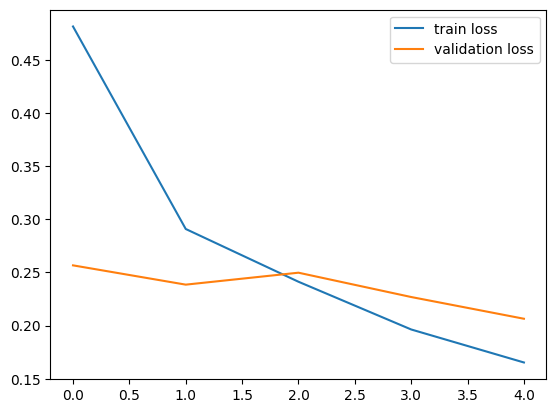

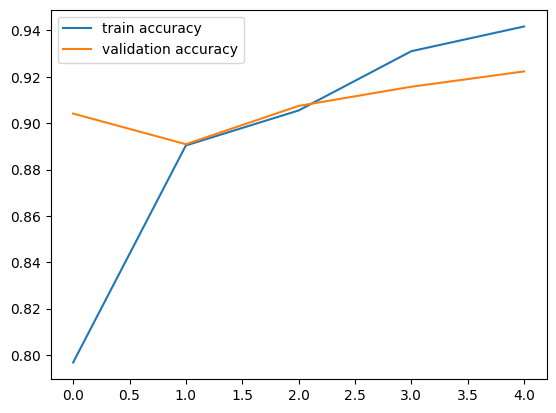

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test_mayank108.jpg


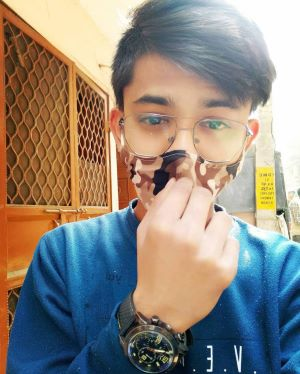

1/1 [==============================] - 0s 38ms/step
[[0.31063387 0.852439  ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')